# Clustering Homework: Iris Species Segmentation with K-means

## Overview
In this homework, you will apply K-means clustering to segment iris flowers based on their measurements. You’ll use the Iris dataset, a classic real-world dataset containing measurements of 150 iris flowers across three species. Your task is to determine the optimal number of clusters, apply K-means clustering, visualize the results, and interpret the clusters.

## Dataset
The Iris dataset is available through `scikit-learn` using `sklearn.datasets.load_iris()`. It includes the following features:
- `sepal length (cm)`: Length of the sepal in centimeters
- `sepal width (cm)`: Width of the sepal in centimeters
- `petal length (cm)`: Length of the petal in centimeters
- `petal width (cm)`: Width of the petal in centimeters

For this assignment, you will use **only `sepal length (cm)` and `petal length (cm)`** as features for clustering.

## Task
Write a Python script in this notebook that performs the following steps:
1. **Load the Dataset**: Load the Iris dataset from `scikit-learn` into a pandas DataFrame.
2. **Preprocessing**: Select the `sepal length (cm)` and `petal length (cm)` columns as features for clustering.
3. **Determine Optimal Clusters**: Use the Elbow Method to find the optimal number of clusters (`k`) for K-means clustering. Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters (try `k` from 1 to 10) and identify the "elbow" point.
4. **Apply K-means Clustering**: Fit a K-means model to the selected features using the optimal `k` you determined. Assign each flower to a cluster.
5. **Visualize the Results**: Create a scatter plot showing the clusters, with `sepal length (cm)` on the x-axis and `petal length (cm)` on the y-axis. Use different colors for each cluster and mark the cluster centroids.
6. **Interpret the Clusters**: Write a brief (2-3 sentence) interpretation of the clusters based on their sepal and petal length patterns (e.g., "Cluster 1 represents flowers with small sepal and petal lengths").

## Requirements
- Use Python with the libraries: `pandas`, `numpy`, `matplotlib`, and `scikit-learn`.
- Include comments in your code to explain each step.
- Handle potential errors (e.g., missing data) with appropriate checks or assumptions.
- Submit your completed notebook as a `.ipynb` file and include the plot as a saved image (e.g., `clusters.png`).

## Starter Code
Below is starter code with more guidance to help you begin. Complete the missing parts to finish the task.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Step 1: Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Dataset loaded successfully!")
print(data.head())

# Step 2: Preprocessing - Select features for clustering
# Select 'sepal length (cm)' and 'petal length (cm)' columns and convert to numpy array
X = data[['sepal length (cm)', 'petal length (cm)']].to_numpy()

# Check for missing values
if np.any(np.isnan(X)):
    print("Warning: Dataset contains missing values. Consider handling them.")
else:
    print("No missing values in selected features.")


Dataset loaded successfully!
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
No missing values in selected features.


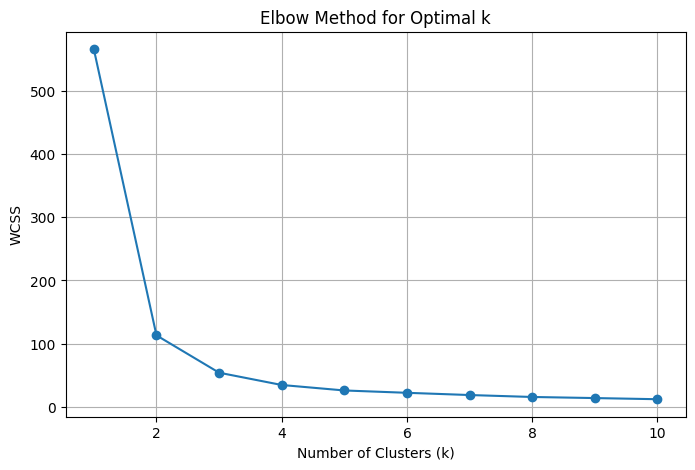

In [7]:
# We discussed the Elbow Method in Module 9 to determine the optimal number of clusters.
# Step 3: Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)  # Fit the model to your data
    wcss.append(kmeans.inertia_)  # Append the WCSS value

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Choose the optimal k based on the elbow plot
# YOUR CODE HERE
optimal_k = 3# Fill this in after analyzing the plot (e.g., where the curve bends)

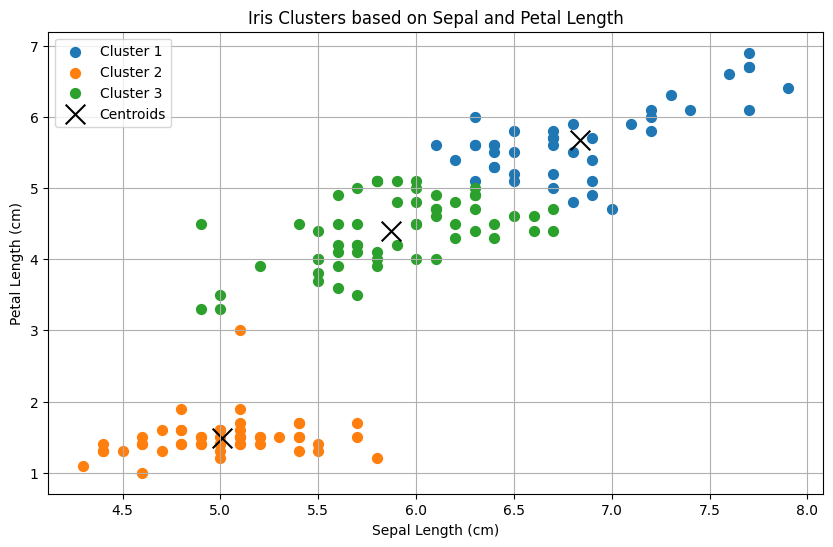

In [8]:
# Step 4: Apply K-means clustering with optimal k
# Initialize and fit KMeans with your chosen optimal_k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Fit and predict cluster labels
cluster_labels = kmeans.fit_predict(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
# Loop through each cluster to plot points
for i in range(optimal_k):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=50, label=f'Cluster {i+1}')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('Iris Clusters based on Sepal and Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("iris_clusters.png")

plt.show()


## Step 6: Interpret the Clusters
Write your interpretation here based on the scatter plot results (2-3 sentences):
- Cluster 1: iris with long petals and long sepal length. it also is close to cluster 3, could indicate that they might be the same species, just with a lot of variation, could also be similar but different species.
- Cluster 2: iris with small petals and small sepal length. it is separate from the other clusters so we can be confident in saying that they are a different species.
- Cluster 3: iris with medium petals and medium sepal length. it also is close to cluster 1, we might be able to say that they are the same species but could also be 2 different similar species.

## Bonus (Optional)
Experiment with adding `petal width (cm)` as a third feature and perform 3D clustering with visualization using `mpl_toolkits.mplot3d`. Discuss how including this feature changes the clustering results.